In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()
        print(city_url)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})
        
    # If an error is experienced, skip the city
    except (ValueError, KeyError):
        print("City not found. Skipping...")
        pass

# Print completion message outside the loop
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | broken hill
http://api.openweathermap.org/data/2.5/weather?q=broken hill&appid=2af4c5e0db538d30ee471f3fbdffe780
Processing Record 2 of Set 1 | meulaboh
http://api.openweathermap.org/data/2.5/weather?q=meulaboh&appid=2af4c5e0db538d30ee471f3fbdffe780
Processing Record 3 of Set 1 | bethel
http://api.openweathermap.org/data/2.5/weather?q=bethel&appid=2af4c5e0db538d30ee471f3fbdffe780
Processing Record 4 of Set 1 | coronel dorrego
http://api.openweathermap.org/data/2.5/weather?q=coronel dorrego&appid=2af4c5e0db538d30ee471f3fbdffe780
Processing Record 5 of Set 1 | sitia
http://api.openweathermap.org/data/2.5/weather?q=sitia&appid=2af4c5e0db538d30ee471f3fbdffe780
Processing Record 6 of Set 1 | fale old settlement
http://api.openweathermap.org/data/2.5/weather?q=fale old settlement&appid=2af4c5e0db538d30ee471f3fbdffe780
Processing Record 7 of Set 1 | waitangi
http://api.openweathermap.org/data/2.5/weather

In [43]:
print(len(city_data))
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

576


City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [44]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,broken hill,-31.9500,141.4333,290.88,47,5,3.40,AU,1712536358
1,meulaboh,4.1363,96.1285,299.31,89,100,1.57,ID,1712536643
2,bethel,41.3712,-73.4140,283.02,49,52,1.01,US,1712536644
3,coronel dorrego,-38.7187,-61.2873,291.72,58,95,4.39,AR,1712536645
4,sitia,35.2000,26.0986,292.03,79,1,10.05,GR,1712536645


In [48]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data\cities.csv", index_label="City_ID")

In [49]:
# Read saved data
city_data_df = pd.read_csv("output_data\cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,broken hill,-31.9500,141.4333,290.88,47,5,3.40,AU,1712536358
1,1,meulaboh,4.1363,96.1285,299.31,89,100,1.57,ID,1712536643
2,2,bethel,41.3712,-73.4140,283.02,49,52,1.01,US,1712536644
3,3,coronel dorrego,-38.7187,-61.2873,291.72,58,95,4.39,AR,1712536645
4,4,sitia,35.2000,26.0986,292.03,79,1,10.05,GR,1712536645


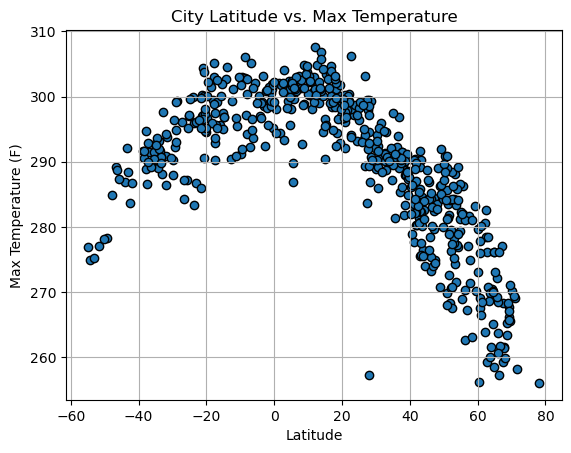

In [50]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Set the title and labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Incorporate other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data\Fig1.png")

# Show plot
plt.show()

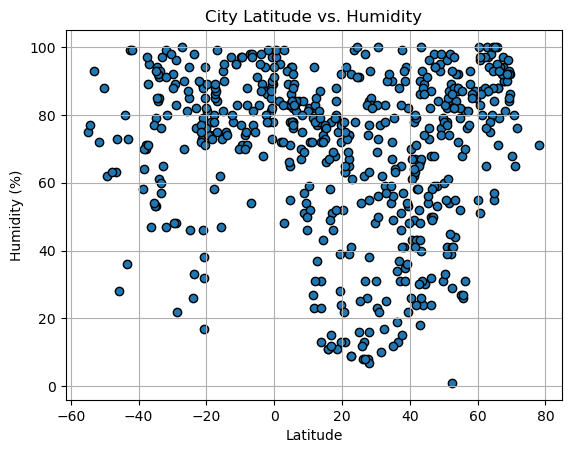

In [27]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Set the title and labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Incorporate other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data\Fig2.png")

# Show plot
plt.show()

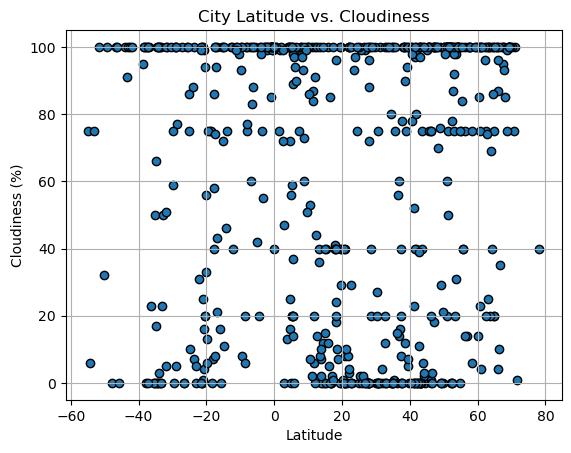

In [28]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Set the title and labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Incorporate other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data\Fig3.png")

# Show plot
plt.show()

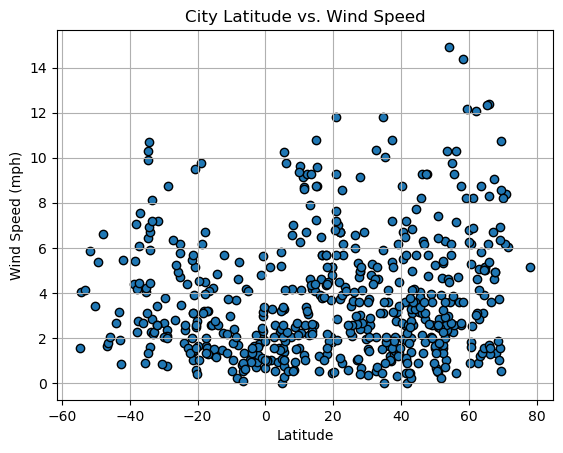

In [29]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Set the title and labels
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Incorporate other graph properties
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

In [30]:
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate regression line
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot
    plt.scatter(x_values, y_values)

    # Plot regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate regression line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Show correlation coefficient
    print(f"The r-squared is: {rvalue**2}")

    # Show plot
    plt.show()

In [31]:
# Filter data for cities in the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,meulaboh,4.1363,96.1285,299.31,89,100,1.57,ID,1712536643
2,bethel,41.3712,-73.4140,283.02,49,52,1.01,US,1712536644
4,sitia,35.2000,26.0986,292.03,79,1,10.05,GR,1712536645
7,tazovsky,67.4667,78.7000,268.30,94,100,9.07,RU,1712536647
9,cabo san lucas,22.8909,-109.9124,297.38,61,0,5.66,MX,1712536446


In [33]:
# Filter data for cities in the Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,broken hill,-31.9500,141.4333,290.88,47,5,3.40,AU,1712536358
3,coronel dorrego,-38.7187,-61.2873,291.72,58,95,4.39,AR,1712536645
5,fale old settlement,-9.3852,-171.2468,302.98,71,8,2.41,TK,1712536647
6,waitangi,-43.9535,-176.5597,286.94,80,100,2.68,NZ,1712536647
8,avarua,-21.2078,-159.7750,300.18,89,100,1.03,CK,1712536648


The r-squared is: 0.7849723090452031


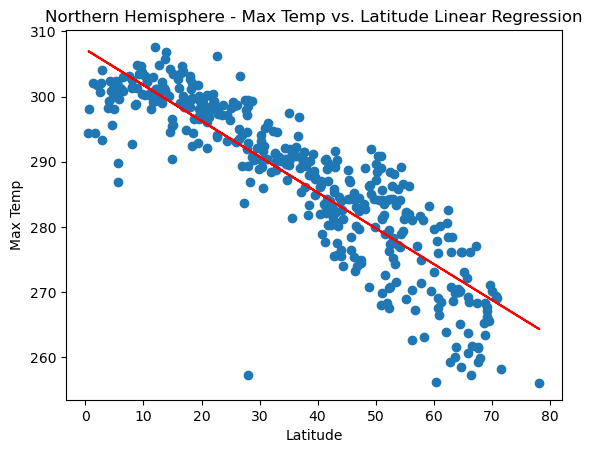

In [32]:
# Perform linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Northern Hemisphere - Max Temp vs. Latitude Linear Regression", (0, 0))

The r-squared is: 0.5419590039522689


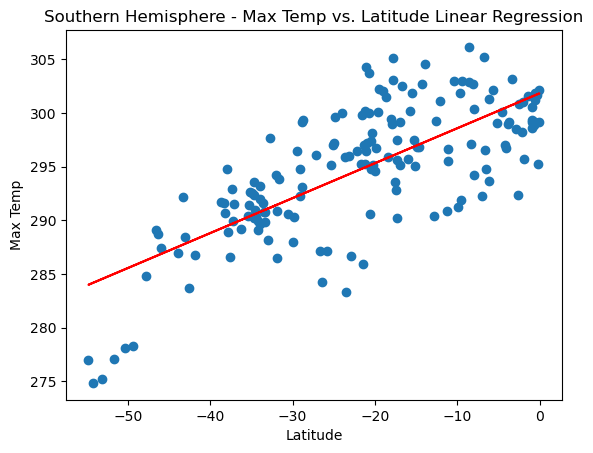

In [35]:
# Perform linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Southern Hemisphere - Max Temp vs. Latitude Linear Regression", (-30, 50))

The r-squared is: 0.02692936044150988


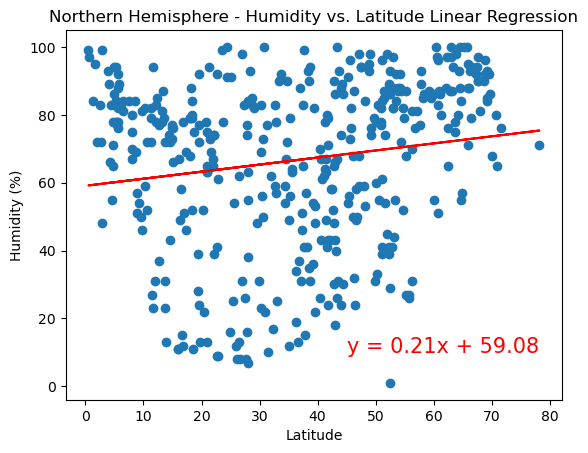

In [36]:
# Perform linear regression on Northern Hemisphere for humidity vs. latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern Hemisphere - Humidity vs. Latitude Linear Regression", (45, 10))

The r-squared is: 0.054496135777164494


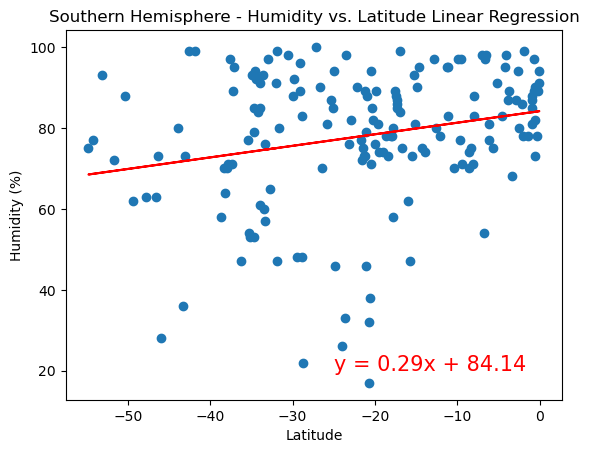

In [37]:
# Perform linear regression on Southern Hemisphere for humidity vs. latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern Hemisphere - Humidity vs. Latitude Linear Regression", (-25, 20))

The r-squared is: 0.04331930376308809


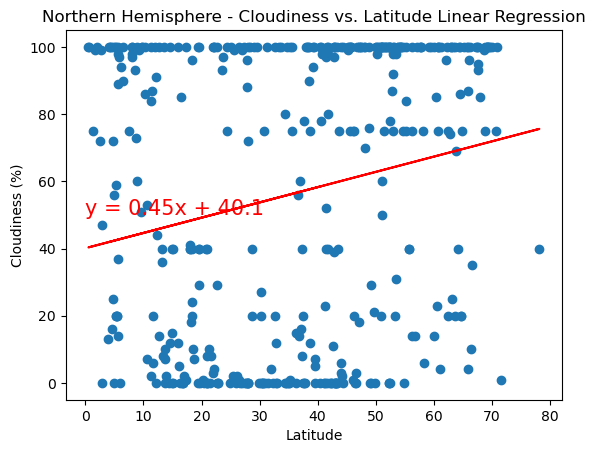

In [39]:
# Perform linear regression on Northern Hemisphere for cloudiness vs. latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression", (0, 50))

In [ ]:
# Perform linear regression on Southern Hemisphere for cloudiness vs. latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression", (-55, 50))

The r-squared is: 0.0150755741871487


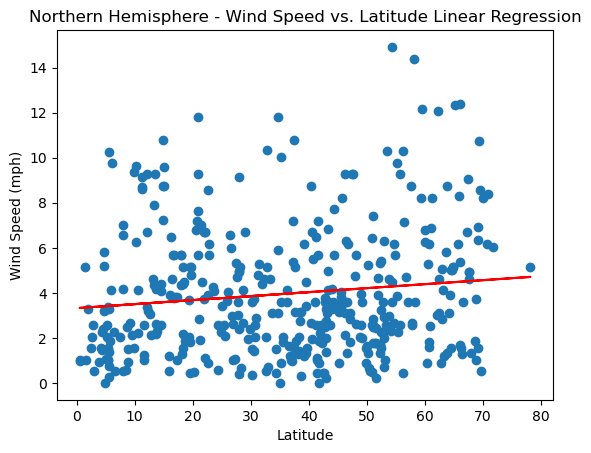

In [41]:
# Perform linear regression on Northern Hemisphere for wind speed vs. latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression", (0, 25))

The r-squared is: 0.12324945173056216


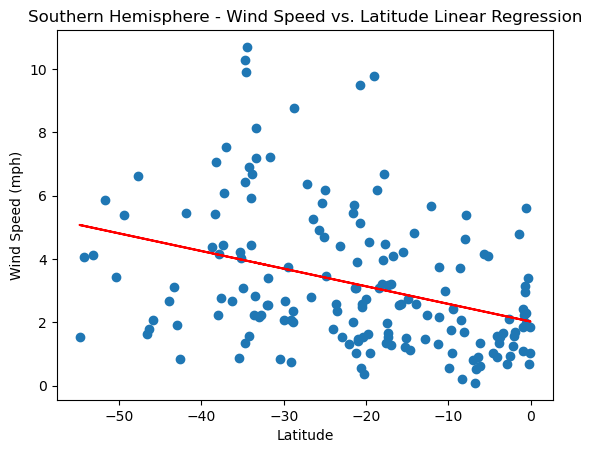

In [42]:
# Perform linear regression on Southern Hemisphere for wind speed vs. latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression", (-55, 20))